# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./train.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

### Data exploration visualization ###

**Helper functions for plotting counts of each sign**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Count examples of each class
def count_examples(labels, n_classes):
    return [sum(labels == c) for c in range(n_classes)]

# Plot a bar chart for the counts of all signs
def plot_counts(n_classes, 
                counts_train, counts_valid=None, counts_test=None, 
                width=0.3):
    # x coordinate: labels
    ind = np.arange(n_classes)

    plt.subplot(111)

    # y coordinate: bars for counts
    # Plot for different sets   
    bars_train = plt.bar(ind, counts_train, width, color='c', linewidth=0)
    legend_artists, legend_labels = (bars_train[0],), ('Train',)
    if counts_valid:
        ind = ind + width
        bars_valid = plt.bar(ind, counts_valid, width, color='r', linewidth=0)
        legend_artists += (bars_valid[0],)
        legend_labels  += ('Valid',)
    if counts_test:
        ind = ind + width
        bars_test = plt.bar(ind, counts_test, width, color='b', linewidth=0)
        legend_artists += (bars_test[0],)
        legend_labels  += ('Test',)
        
    plt.title('Counts for each sign') 
    plt.ylabel('Counts')
    plt.xlabel('Signs(labels)')
    plt.legend(legend_artists, legend_labels, loc=0)

    plt.show()

**Count examples of all signs, and plot the counts**

Number of examples for each sign
- In training set: [210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]
- In testing set: [60, 720, 750, 450, 660, 630, 150, 450, 450, 480, 660, 420, 690, 720, 270, 210, 150, 360, 390, 60, 90, 90, 120, 150, 90, 480, 180, 60, 150, 90, 150, 270, 60, 210, 120, 390, 120, 60, 690, 90, 90, 60, 90]


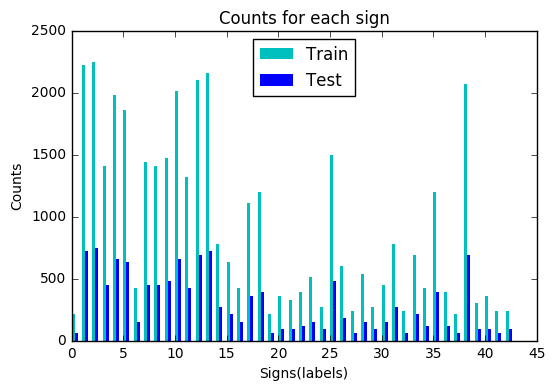

In [4]:
counts_train = count_examples(y_train, n_classes)
counts_test  = count_examples(y_test, n_classes)

print("Number of examples for each sign")
print("- In training set: {0}".format(counts_train))
print("- In testing set: {0}".format(counts_test))
    
plot_counts(n_classes, counts_train, counts_test=counts_test)

**Helper functions for plotting images**

In [5]:
import csv

# Helper function for randomly fetching n images for each sign
def fetch_images(labels, n_classes, n):
    """
    Randomly fetch 'n' images in each class 
    by putting every 'n' indices into an array.
    Altogether for all classes, return a 2D array.
    """
    indices = []
    for i in range(n_classes): 
        indices_per_class = np.array(np.nonzero(labels == i)).flatten()
        indices_fetched = np.random.choice(indices_per_class, n, replace=False)
        indices.append(indices_fetched)
    return np.array(indices)

# Helper function for map out the names of signs
def map_names(path):
    """
    Take the signnames.csv file. 
    Return a list of names.
    """
    with open(path) as f:
        reader = csv.DictReader(f)
        return [row['SignName'] for row in reader]
            
# Function used to plot n images for each sign in a row, 
# and all signs will be plotted row by row. 
# Write classes and sign names to the upper-left of rows.
def plot_images(images, indices, n_classes, n, names):
    assert indices.size == n_classes * n
    
    for row in range(n_classes):
        # Create figure with 1 x n sub-plots.
        fig, axes = plt.subplots(1, n)
        fig.subplots_adjust(wspace=0.3)
        
        for i, ax in enumerate(axes.flat):
            # Plot image.
            ax.imshow(images[indices[row][i]])
        
            # Remove ticks from the plot.
            ax.set_xticks([])
            ax.set_yticks([])
        
        # Write class id and sign name to the upper-left of the row
        text = "Class {0}: {1}".format(row, names[row])
        plt.figtext(0.0, 0.65, text, horizontalalignment='left')
        
        plt.show()

**Plot images**

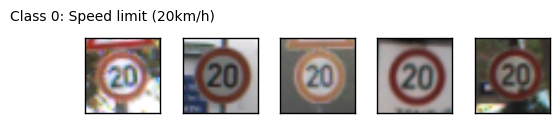

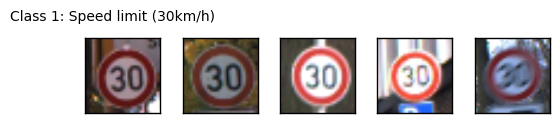

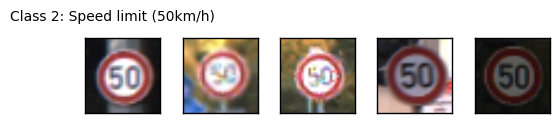

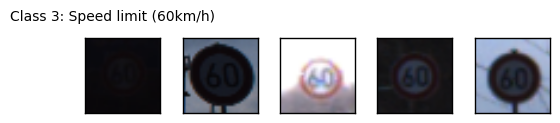

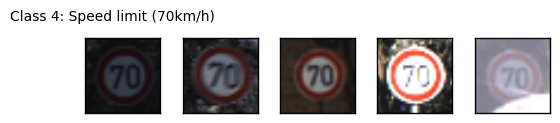

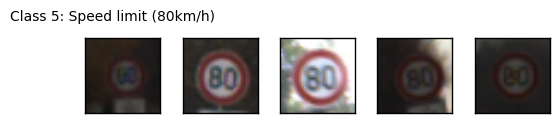

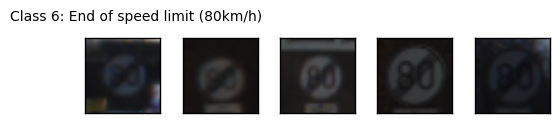

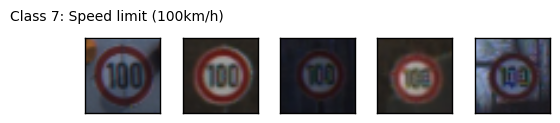

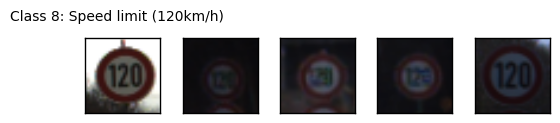

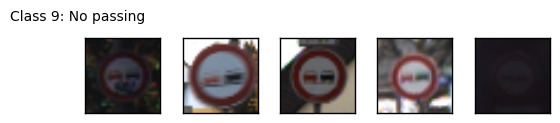

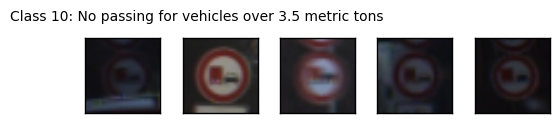

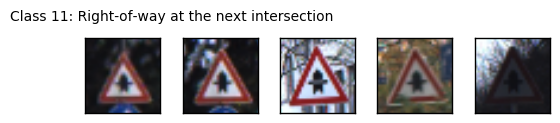

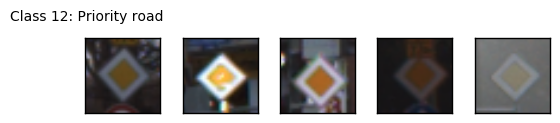

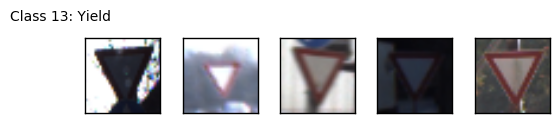

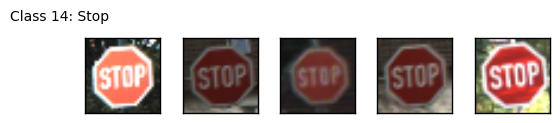

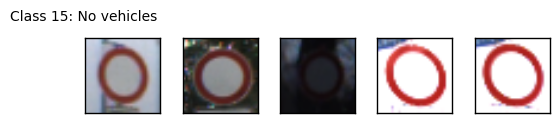

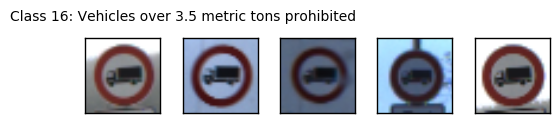

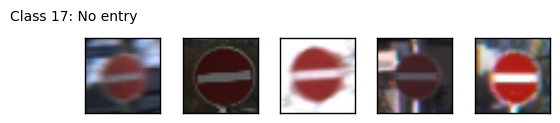

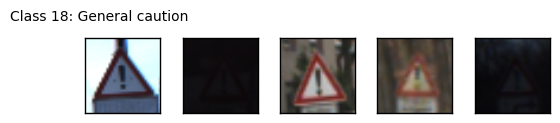

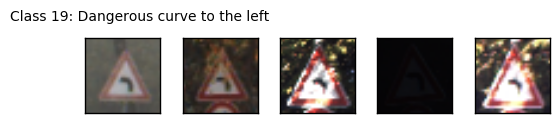

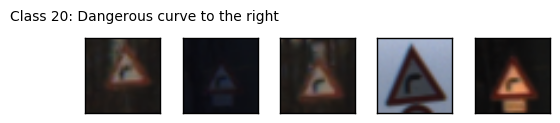

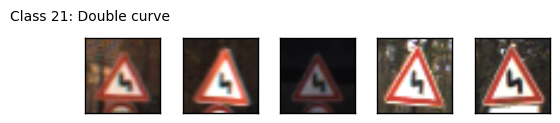

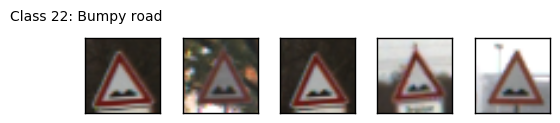

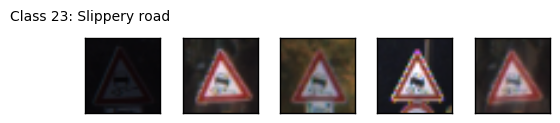

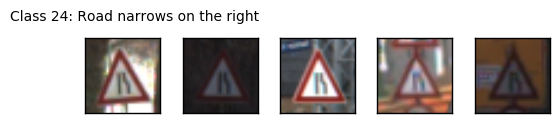

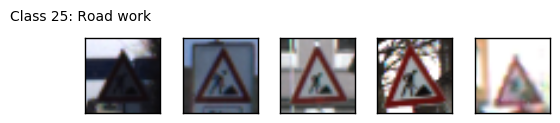

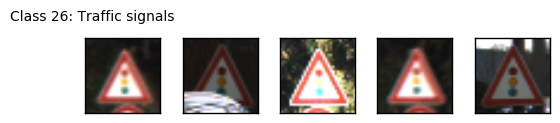

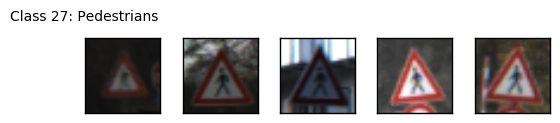

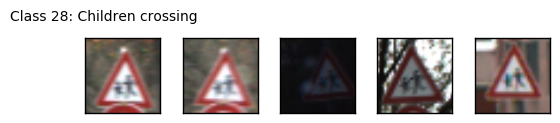

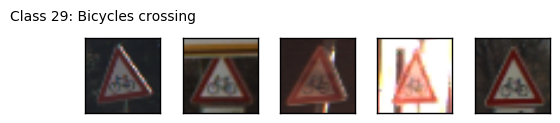

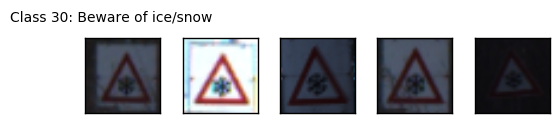

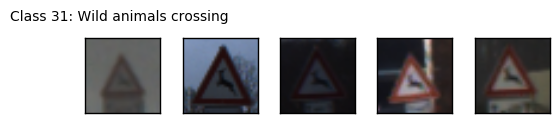

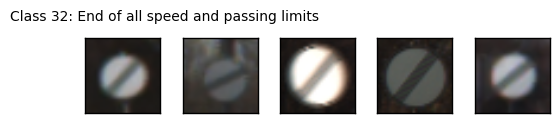

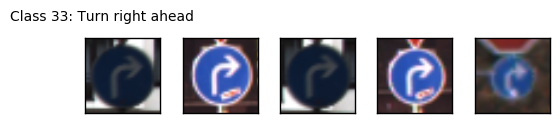

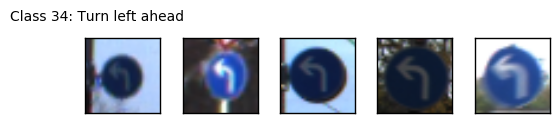

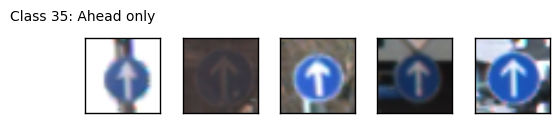

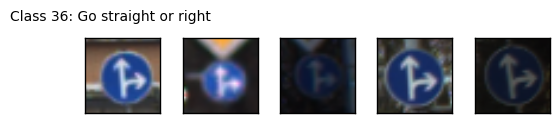

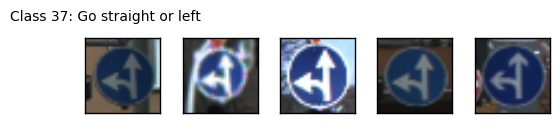

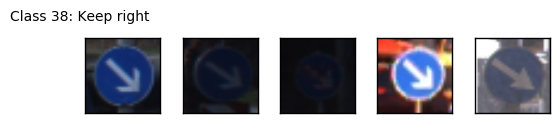

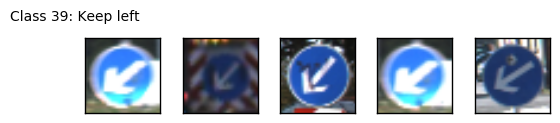

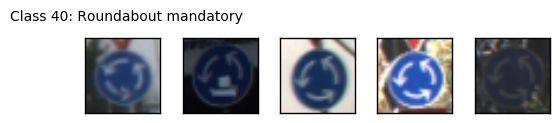

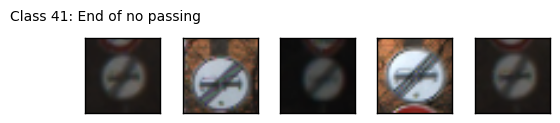

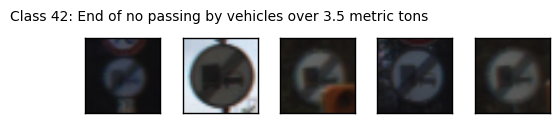

In [6]:
n = 5
indices = fetch_images(y_train, n_classes, n)

file_path = "./signnames.csv"
names = map_names(file_path)

plot_images(X_train, indices, n_classes, n, names)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Preprocess the data ###

**Normalize image data**

In [7]:
# Implement Min-Max scaling for image data
def normalize(X_data):
    """
    Take image data 'X_data'. Normalize the image data
    with Min-Max scaling to a range of [-1.0, 1.0].
    Return the normalized data.
    """
    a, b = -1.0, 1.0
    X_max, X_min = 255, 0
    return a + (X_data - X_min) * (b - a) / (X_max - X_min)

X_train = normalize(X_train)
X_test = normalize(X_test)

assert X_train[0].shape == X_test[0].shape == image_shape
print('Image data nomalization done.')

Image data nomalization done.


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

> Normalize image data by Min-Max scaling, so that features have zero mean and equal variance, which makes it easier for optimization to proceed numerically.

> Tried grayscale images, however it didn't improve test accuracy. After reviewing the approach done by Sermanet and LeCun, I took the suspect that the normalized color channels may be more informative than raw color. And as for the essence of CNN, we shall allow the networks to learn by themselves about the color space for discriminative information. So I withdrew the grayscale step.

### Generate data additional data (OPTIONAL!) Split the data into training/validation/testing sets. ###

**Split data into training/validation/test sets**

In [8]:
# Shuffle the training set
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
print('Training examples shuffled.')

# Slice off a validation set from the training set
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, 
                                                                test_size=0.2, random_state=0)
print('Number of training examples =', X_train.shape[0])
print('Number of validation examples =', X_validation.shape[0])

Training examples shuffled.
Number of training examples = 31367
Number of validation examples = 7842


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

> There is no validation set. So, split the training set into training and validation sets. Before the split, shuffle the  training set to avoid the effect of example orders on split result.

> Optional part wasn't implemented. For future work, fake data by jittering present images, so called image augmentation in Sermanet and LeCun paper, shall be done to solve the unbalanced data distributions between classes.

### Define your architecture ###

In [9]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

**Define the architecture of convolutional neural networks**

In [10]:
def CNN(x):    
    # Setup random values
    mu = 0
    sigma = 0.1
    
    
    # Layer 1: 
    # Convolution. Input = 32x32x3. Output = 28x28x100.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 100), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(100))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # Pooling. Input = 28x28x100. Output = 14x14x100.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Activation. Input = 14x14x100. Output = 14x14x100.
    conv1 = tf.nn.relu(conv1)
    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.


    # Layer 2: 
    # Convolution. Input = 14x14x100. Output = 10x10x200.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 100, 200), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(200))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Pooling. Input = 10x10x200. Output = 5x5x200.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Activation. Input = 5x5x200. Output = 5x5x200.
    conv2 = tf.nn.relu(conv2)


    # Flatten. Input = 5x5x200. Output = 5000.
    fc0 = flatten(conv2)
      
    
    # Layer 3: 
    # Fully Connected. Input = 5000. Output = 256.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(5000, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation. Input = 256. Output = 256.
    fc1 = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    

    # Layer 4: 
    # Fully Connected. Input = 256. Output = 128.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(256, 128), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(128))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation. Input = 128. Output = 128.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    
    # Layer 5: 
    # Fully Connected. Input = 128. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    fc_weights = (fc1_W, fc2_W, fc3_W)
    
    return logits, fc_weights

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

> Implement 5 layer convolutional neural networks.

> **Input**

> The CNN-5 architecture accepts a 32x32xC image as input, where C is the number of color channels. Since traffic signs are in color, C is 3 in this case.

> **Architecture**

> Layer 1 ConvNet: 100-5x5 filters, max pooling with stride 2, ReLU activation.

> Layer 2 ConvNet: 200-5x5 filters, max pooling with stride 2, ReLU activation.

> Flatten.

> Layer 3 Fully Connected: 256 neurons, ReLU activation, dropout.

> Layer 4 Fully Connected: 128 neurons, ReLU activation, dropout.

> Layer 5 Fully Connected: 43 outputs (logits).

> **Output**

> Return logits and the weights of all fully connected layers.

### Train your model ###

**Define placeholders**

In [11]:
# Define features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Define keep probability for dropout
keep_prob = tf.placeholder(tf.float32)

**Setup training pipeline**

In [12]:
# Setup learning rate and regularization coeff.
rate = 1e-3
beta = 5e-4

# CNN operation
logits, fc_weights = CNN(x)

# Cross entropy and regularization
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_weights = sum([tf.nn.l2_loss(W) for W in fc_weights])
loss_operation = tf.reduce_mean(cross_entropy) + beta * loss_weights

# Setup optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [13]:
# Setup batch size and epochs values
EPOCHS = 10
BATCH_SIZE = 128

**Define prediction and accuracy operations as well as helper function for evaluation**

In [14]:
# Evaluate the loss and accuracy of the model for a given dataset.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, 
                            feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

**Train the model**

In [15]:
# Run the training data through the training pipeline to train the model.
# Before each epoch, shuffle the training set.
# After each epoch, measure the loss and accuracy of the validation set.
# Save the model after training.
# Report the exectuion time of training.

saver = tf.train.Saver()
save_file = 'train_model.ckpt'

import time
start_time = time.clock()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'train_model.ckpt')
    print("Model saved")
    
end_time = time.clock()
print("Training took {0} seconds.".format(end_time-start_time))

Training...

EPOCH 1 ...
Validation Accuracy = 0.597

EPOCH 2 ...
Validation Accuracy = 0.865

EPOCH 3 ...
Validation Accuracy = 0.931

EPOCH 4 ...
Validation Accuracy = 0.965

EPOCH 5 ...
Validation Accuracy = 0.978

EPOCH 6 ...
Validation Accuracy = 0.987

EPOCH 7 ...
Validation Accuracy = 0.988

EPOCH 8 ...
Validation Accuracy = 0.991

EPOCH 9 ...
Validation Accuracy = 0.988

EPOCH 10 ...
Validation Accuracy = 0.993

Model saved
Training took 171.127724 seconds.


**Evaluate the model on test set**

In [16]:
saver = tf.train.Saver()
save_file = './train_model.ckpt'

with tf.Session() as sess:
    saver.restore(sess, save_file)

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.964


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

> Use Adam optimizer, similar to stochastic gradient descent, but a little more sophisticated.

> Choose batch size as 128, and 10 training epochs.

> Use zero mean and variance of 0.1 for random values. Use learning rate of 0.001, and beta for regularization of 0.0005.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

> 1) Use convolutional neural networks from LeNet as the baseline model, and apply similar architecture setup as in Sermanet and LeCun's approach. It's proved that such approach and CNN architecture can effectively solve the classification assignment for traffic signs.

> 2) Incorporate feature scaling to normalize image data.

> 3) Add dropout and regularization to the fully connected layers. Such approaches effectively prevent overfitting to some extent and improve test accuracy.

> 4) As mentioned above, tried grayscale for preprocessing. But withdrew it afterwards.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Load the images and plot them ###

**List new traffic sign image files captured from the web**

In [17]:
import glob

new_sign_path = './new_signs/*.jpg'
glob.glob(new_sign_path)

['./new_signs/07.jpg',
 './new_signs/02.jpg',
 './new_signs/03.jpg',
 './new_signs/09.jpg',
 './new_signs/08.jpg',
 './new_signs/04.jpg',
 './new_signs/01.jpg',
 './new_signs/06.jpg',
 './new_signs/05.jpg']

**Resize new images and load data**

In [18]:
# Resize images to a specified size.
# Import image data into numpy arrays.
from PIL import Image

size = (32, 32)
features = []

for file_path in glob.glob(new_sign_path):
    with Image.open(file_path) as img:
        img = img.resize(size, resample=Image.LANCZOS)
        feature = np.array(img)
        features.append(feature)

X_new = np.array(features)
print("New image data shape = {0}".format(X_new.shape))
print("Number of new images: {0}".format(len(X_new)))

New image data shape = (9, 32, 32, 3)
Number of new images: 9


**Plot new images**

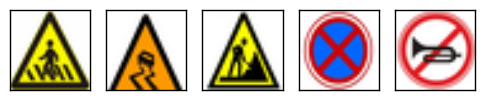

In [19]:
m = 5
indices = np.random.choice(range(X_new.shape[0]), m, replace=False)

f, axes = plt.subplots(1, m)
for n, ax in enumerate(axes):
    ax.imshow(X_new[indices[n]])
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

> These new images are basic traffic signs in China. However, most of them have no appropriate correspondence in the German dataset. Therefore, it will be difficult to classify them. And we definitely need to make local traffic sign dataset to train this classifier, if we'd apply it in China.

> In this case, the signs shown above are for:
1. Pedestrian crossing
2. Slippery road
3. Road work
4. Parking prohibited
5. Horning prohibited

### Run the predictions ###

In [20]:
# Remove previous tensors and operations
tf.reset_default_graph()

# Define placeholders for new features and dropout param.
x_new = tf.placeholder(tf.float32, (None, 32, 32, 3))
keep_prob = tf.placeholder(tf.float32)

# Define prediction operation
prediction_operation = tf.argmax(CNN(x_new)[0], 1)

saver = tf.train.Saver()
save_file = './train_model.ckpt'

with tf.Session() as sess:
    saver.restore(sess, save_file)
    prediction = sess.run(prediction_operation, 
                          feed_dict={x_new: X_new[indices], keep_prob: 1})
    print(prediction)

[12 11 25 38 41]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
> No, my model is now not able to perform equally well on these new images. By manually checking with signnames.csv, the accuracy in this case of 5 new signs is merely 20%. The classifier only recognized the 'road work' sign in China correctly, which happens to be similar to German one. Comparatively, the test accuracy on German test dataset was 96.4%.

> Again, the reason is that some traffic signs in China are not yet included in current training set.

### Visualize the softmax probabilities ###

In [21]:
# Remove previous tensors and operations
tf.reset_default_graph()

# Define placeholders for new features and dropout param.
x_new = tf.placeholder(tf.float32, (None, 32, 32, 3))
keep_prob = tf.placeholder(tf.float32)

# Define softmax operation
softmax = tf.nn.softmax(CNN(x_new)[0])

# Define top_k operation
k = 5
top_k_prediction = tf.nn.top_k(softmax, k)

saver = tf.train.Saver()
save_file = './train_model.ckpt'

with tf.Session() as sess:
    saver.restore(sess, save_file)
    top_k_prediction = sess.run(top_k_prediction, 
                                feed_dict={x_new: X_new[indices], keep_prob: 1})
    print(top_k_prediction)

TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[12,  0,  1,  2,  3],
       [11,  0,  1,  2,  3],
       [25,  0,  1,  2,  3],
       [38,  0,  1,  2,  3],
       [41,  0,  1,  2,  3]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> The model is quite certain of all its predictions, which have 1.0 softmax probabilities for the first top predictions. 

> The correct prediction didn't come up in the top k, because the new signs are local in China, and not present in current German dataset. Current model cannot yet classify the unseen signs well.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.